import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

(1367, 1025, 3)

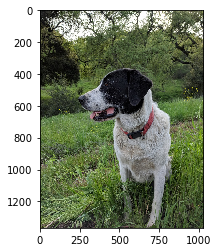

In [17]:
full_image = cv2.imread('../DATA/sammy.jpg')
full_image = cv2.cvtColor(full_image,cv2.COLOR_BGR2RGB)
plt.imshow(full_image)
full_image.shape

(375, 486, 3)

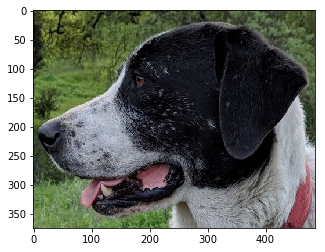

In [15]:
face_image = cv2.imread('../DATA/sammy_face.jpg')
face_image = cv2.cvtColor(face_image,cv2.COLOR_BGR2RGB)
plt.imshow(face_image)


In [14]:
face_image.shape

(375, 486, 3)

# Code for Template matching object Detector

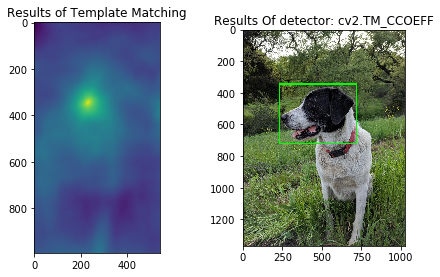

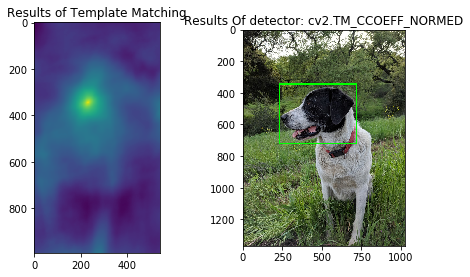

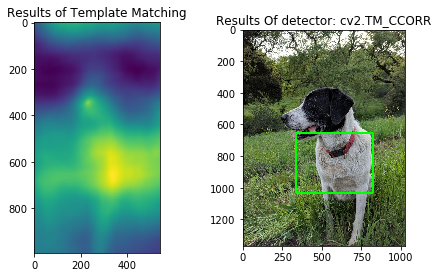

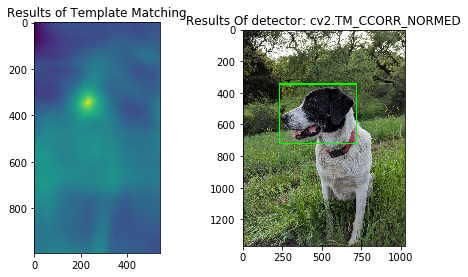

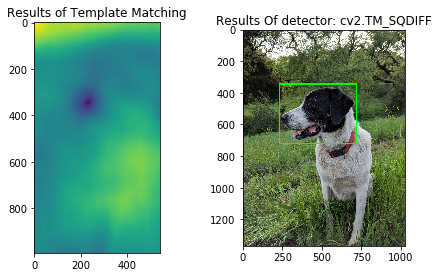

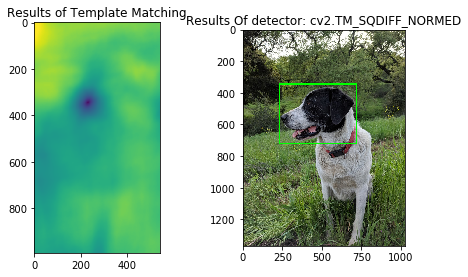

In [31]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

full_image = cv2.imread('../DATA/sammy.jpg')
full_image = cv2.cvtColor(full_image,cv2.COLOR_BGR2RGB)
#plt.imshow(full_image)
face_image = cv2.imread('../DATA/sammy_face.jpg')
face_image = cv2.cvtColor(face_image,cv2.COLOR_BGR2RGB)
#plt.imshow(face_image)
height, Width, Channels = face_image.shape
#print(f"height: {height}, Width: {Width}")

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for i in methods: 
    image_copy = full_image.copy()
    detector = eval(i)
    res = cv2.matchTemplate(image_copy,face_image,detector)
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if detector in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0]+Width, top_left[1]+ height)
    cv2.rectangle(image_copy,top_left,bottom_right,(0,255,0),10)
    
    #plots 
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Results of Template Matching")
    
    
    plt.subplot(122)
    plt.imshow(image_copy)
    plt.title(f"Results Of detector: {i}")
    
    plt.subplots_adjust(left=0.1,
    bottom=0.1,
    right= 1,
    top=0.9,
    wspace=0.4,
    hspace=0.4)
    
    plt.show()
    print('\n')
    print('\n')
    
        
    #print(max_loc)
    #print(bottom_right)
    
    
    
        
    
    
    
    

## Corner Detection

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

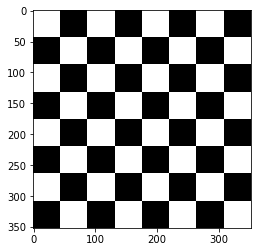

In [30]:
chess_board_img = cv2.imread("../DATA/flat_chessboard.png")
chess_board_img = cv2.cvtColor(chess_board_img,cv2.COLOR_BGR2RGB)
gray_chess_board_img = cv2.cvtColor(chess_board_img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_chess_board_img,cmap='gray')
chess_board_img_gray = np.float32(gray_chess_board_img)
chess_board_img_gray


In [10]:
chess_board_img_real_gray = np.float32(chess_board_img_real)

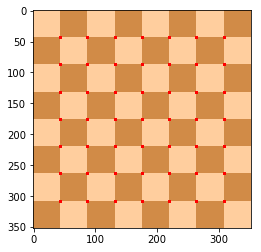

In [36]:
dst = cv2.cornerHarris(src = chess_board_img_gray,blockSize= 2,ksize= 3,k= 0.04)
dst = cv2.dilate(dst,None)
chess_board_img[dst>0.01*dst.max()] = [255, 0, 0]
plt.imshow(chess_board_img)



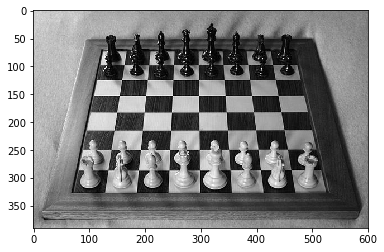

In [48]:
chess_board_img_real = cv2.cvtColor(cv2.imread("../DATA/real_chessboard.jpg"),cv2.COLOR_BGR2RGB)
gray_chess_board_real = cv2.cvtColor(chess_board_img_real,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_chess_board_real,cmap='gray')
chess_board_img_real_gray = np.float32(gray_chess_board_real)

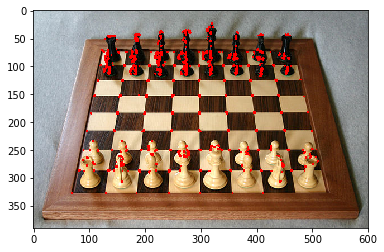

In [51]:
dst = cv2.cornerHarris(src = chess_board_img_real_gray,blockSize= 2,ksize= 3,k= 0.04)
dst = cv2.dilate(dst,None)
chess_board_img_real[dst>0.01*dst.max()] = [255, 0, 0]
plt.imshow(chess_board_img_real,cmap='gray')



## shi-thomsi corner detection


In [53]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

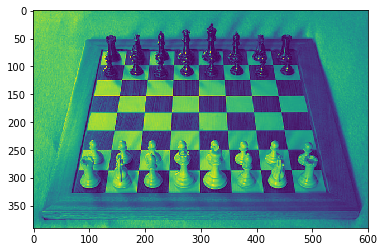

In [161]:
flat_chess = cv2.imread("../DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
flat_chess_gray = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
#plt.imshow(flat_chess)
plt.imshow(flat_chess_gray)

flat_chess_real = cv2.imread("../DATA/real_chessboard.jpg")
flat_chess_real = cv2.cvtColor(flat_chess_real,cv2.COLOR_BGR2RGB)
gray_flat_chess_real = cv2.cvtColor(flat_chess_real,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess_real)


In [162]:
corners = cv2.goodFeaturesToTrack(flat_chess_gray,120,0.01,120)
corners_real = cv2.goodFeaturesToTrack(gray_flat_chess_real,64,0.09,10)

#corners


In [163]:
corners = np.int0(corners)
corners_real = np.int0(corners_real)
#corners


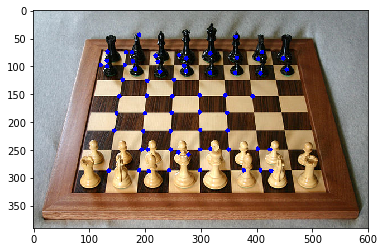

In [164]:
for i in corners_real: 
    x,y = i.ravel()
    cv2.circle(flat_chess_real,(x,y),4,(0,0,255),-1)
    
plt.imshow(flat_chess_real, cmap='gray')


## Edge Detection

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

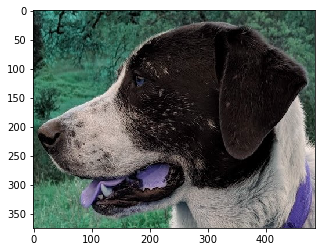

In [4]:
dog_face = cv2.imread("../DATA/sammy_face.jpg")
plt.imshow(dog_face)


In [8]:
med_val = np.median(dog_face)
med_val

64.0

In [17]:
lower = int(max(0,0.7*med_val))
upper = int(min(0,1.3*med_val))

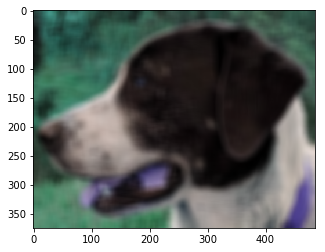

In [18]:
face_blur = cv2.blur(dog_face,(15,15))
plt.imshow(face_blur)

In [23]:
edges = cv2.Canny(face_blur,lower-10,upper+50)

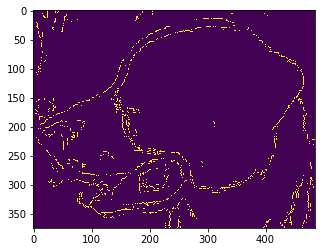

In [24]:
plt.imshow(edges)

## Grid detection

In [25]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 


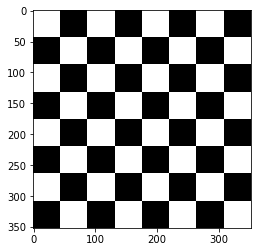

In [28]:
flat_chess = cv2.imread("../DATA/flat_chessboard.png",0)
plt.imshow(flat_chess,cmap="gray")

In [29]:
found, corners = cv2.findChessboardCorners(flat_chess, (7,7))

In [30]:
found


True

In [31]:
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)

array([[215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       ...,
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215]], dtype=uint8)

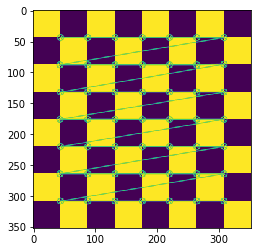

In [33]:
plt.imshow(flat_chess)

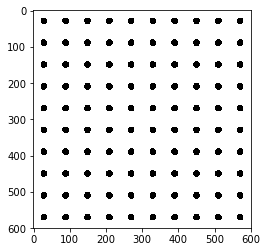

In [35]:
dot_img = cv2.imread("../DATA/dot_grid.png")
plt.imshow(dot_img)

In [36]:
found,circles = cv2.findCirclesGrid(dot_img,(10,10),cv2.CALIB_CB_ASYMMETRIC_GRID)
found

True

cv2.drawChessboardCorners(dot_img,(10,10),circles,found)

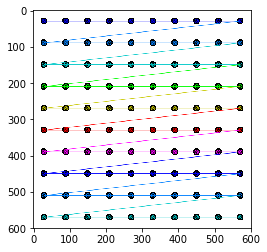

In [39]:
plt.imshow(dot_img)

## contour detection 


In [40]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

In [41]:
contour_img = cv2.imread("../DATA/internal_external.png",0)

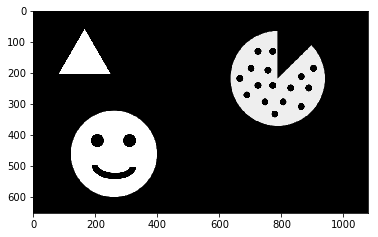

In [42]:
plt.imshow(contour_img,cmap="gray")

In [70]:
image,contours,hireachy =cv2.findContours(contour_img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
hireachy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

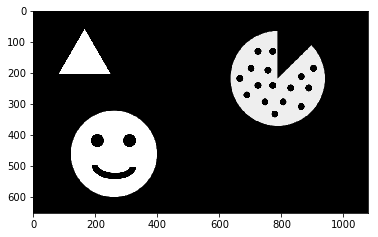

In [44]:
plt.imshow(image,cmap="gray")

In [45]:
image.shape

(652, 1080)

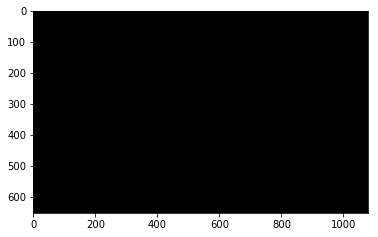

In [47]:
external_img = np.zeros(image.shape)
plt.imshow(external_img,cmap="gray")

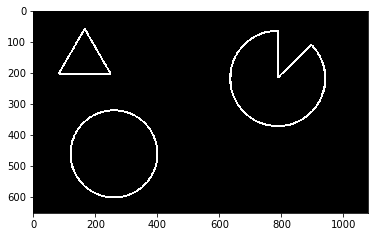

In [71]:
for i in range(len(contours)):
    if hireachy[0][i][3] == -1:
        cv2.drawContours(external_img,contours,i,255,5)
        
plt.imshow(external_img,cmap="gray")
        
    
    

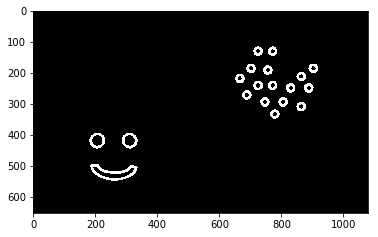

In [73]:
internal_img = np.zeros(image.shape)
for i in range(len(contours)):
    if hireachy[0][i][3] != -1:
        cv2.drawContours(internal_img,contours,i,255,8)

plt.imshow(internal_img,cmap="gray")

## Feature Matching 


## uses features from input image and finds the same features in the target image 

In [76]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [77]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = "gray")
    

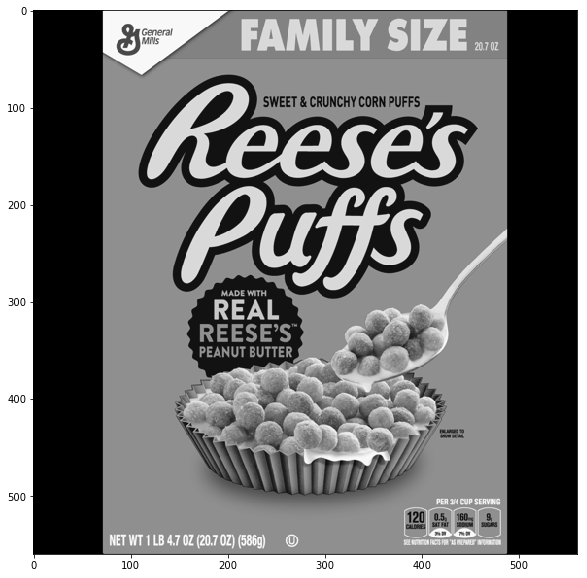

In [78]:
resses = cv2.imread("../DATA/reeses_puffs.png",0)
display(resses)

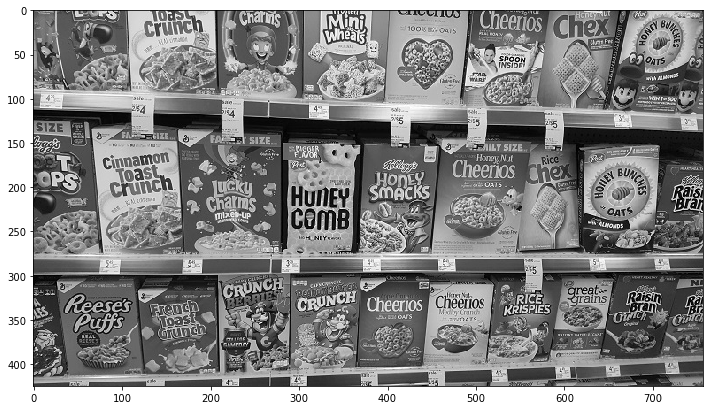

In [80]:
tar_img = cv2.imread("../DATA/many_cereals.jpg",0)
display(tar_img)

# Brute force Template matching 

In [82]:
# create an object
orb = cv2.ORB_create()

In [84]:
kp1,des1 = orb.detectAndCompute(resses,None)
kp2,des2 = orb.detectAndCompute(tar_img,None)

In [85]:
brute_f = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [87]:
matches = brute_f.match(des1,des2)

In [88]:
matches = sorted(matches,key=lambda x:x.distance)

In [89]:
matched_img = cv2.drawMatches(resses,kp1,tar_img,kp2,matches[:25],None,flags=2)

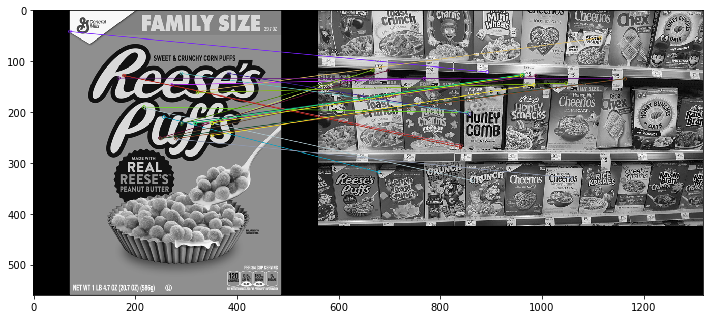

In [90]:
display(matched_img)

## Brute force swift Descriptor 

In [95]:
# create an swift object 
swift_ob = cv2.xfeatures2d.SIFT_create()

In [96]:
kp1,des1 = swift_ob.detectAndCompute(resses,None)
kp2,des2 = swift_ob.detectAndCompute(tar_img,None)


In [97]:
bf = cv2.BFMatcher()

In [100]:
matches = bf.knnMatch(des1,des2,k =2) # Created matches 
# matches

In [107]:
# Create a ratio test to eleminate bad matches 
good_match = []

for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good_match.append([match1])
    

In [108]:
len(good_match)

67

In [110]:
sift_matches = cv2.drawMatchesKnn(resses,kp1,tar_img,kp2,good_match,None,flags=2)

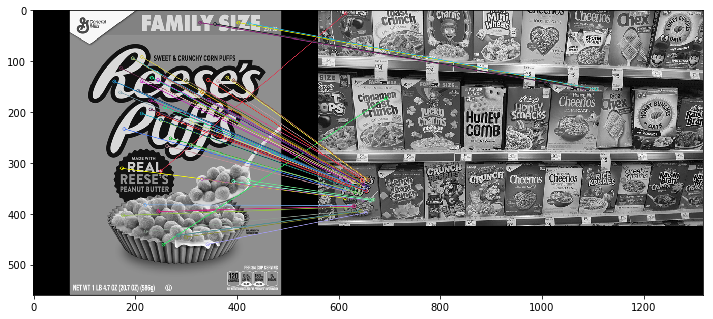

In [111]:
display(sift_matches)

## FLANN based Descriptor 

In [121]:
sift_ob = cv2.xfeatures2d.SIFT_create()

In [122]:
kp1,des1 = sift_ob.detectAndCompute(resses,None)
kp2,des2 = sift_ob.detectAndCompute(tar_img,None)

In [123]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm= FLANN_INDEX_KDTREE,trees = 5)
search_params = dict(checks=50)


In [124]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

In [125]:
good  = []
for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])
    

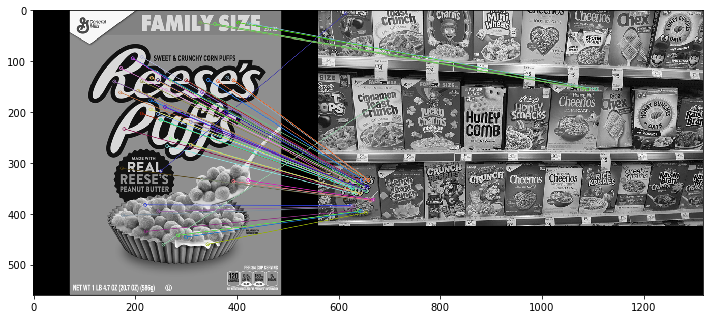

In [126]:
flann_matches = cv2.drawMatchesKnn(resses,kp1,tar_img,kp2,good,None,flags=2)
display(flann_matches)

## water shed algorithm 

lets try egmenting with basic algorithms we know 

In [158]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [159]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = "gray")
    

In [160]:
coins_img = cv2.imread("../DATA/pennies.jpg")

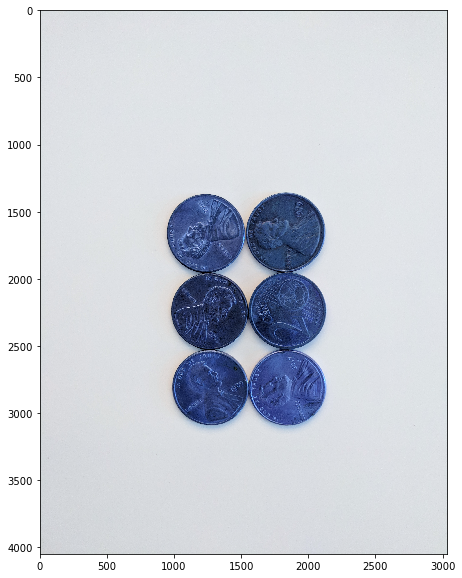

In [161]:
display(coins_img)

1. Applying median blur 


In [167]:
coins_copy = coins_img.copy()
coins_copy = cv2.medianBlur(coins_copy,33)

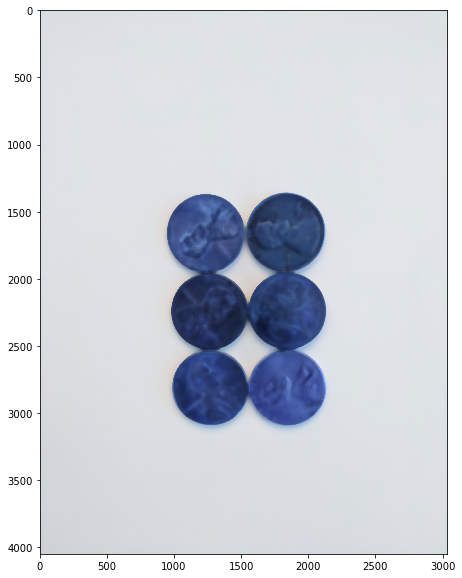

In [168]:
display(coins_copy)

## Apply binary threshold 

In [169]:
coins_gray = cv2.cvtColor(coins_copy,cv2.COLOR_BGR2GRAY)

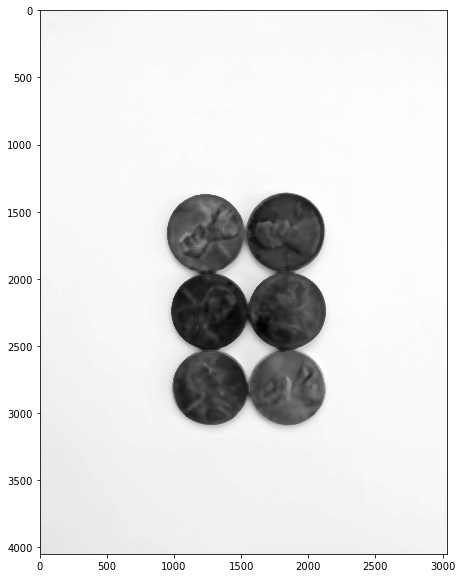

In [170]:
display(coins_gray)

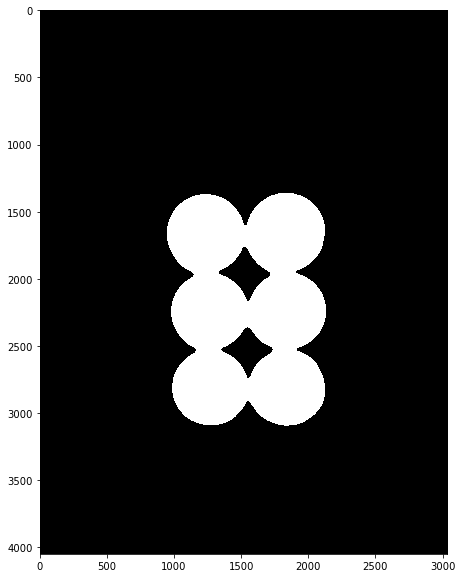

In [171]:
ret, sep_thresh = cv2.threshold(coins_gray,165,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [172]:
img,contours, hireachy = cv2.findContours(sep_thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [173]:
for i in range(len(contours)): 
    if hireachy[0][i][3] == -1 :
        cv2.drawContours(coins_img,contours,i,(255,0,0),10)
        
        

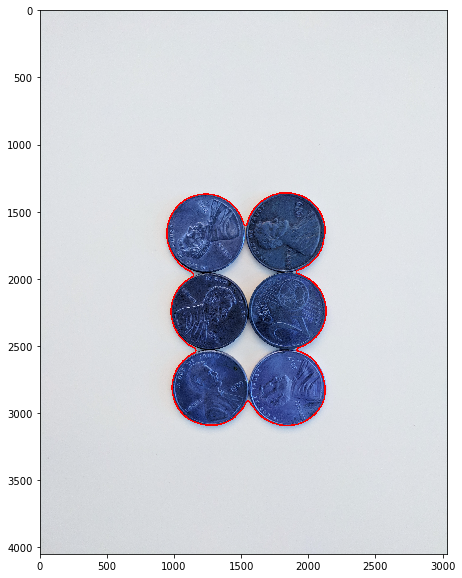

In [174]:
display(coins_img)

## Applying watershed algorithms 

In [208]:
img = cv2.imread("../DATA/pennies.jpg")

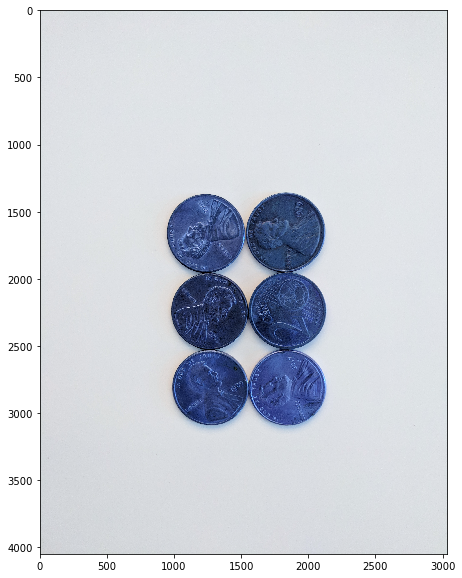

In [209]:
display(img)

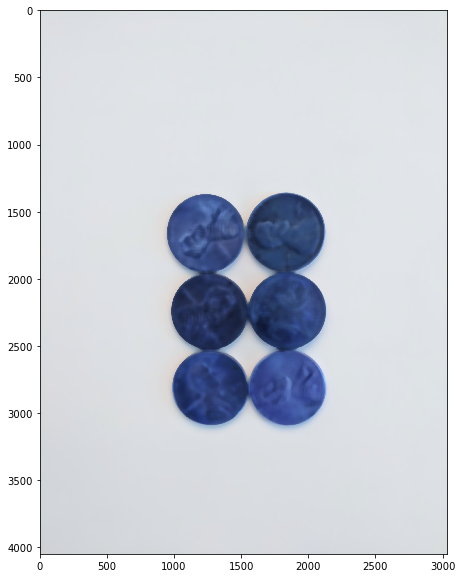

In [210]:
## Apply median blur 
img_blur = cv2.medianBlur(img,35)
display(img_blur)

In [211]:
img_blur_gray = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)

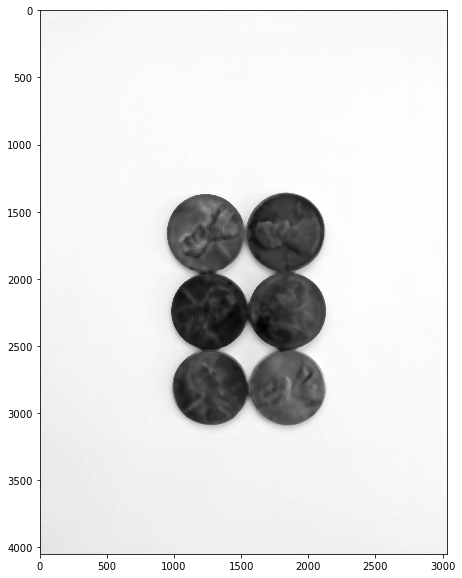

In [212]:
display(img_blur_gray)

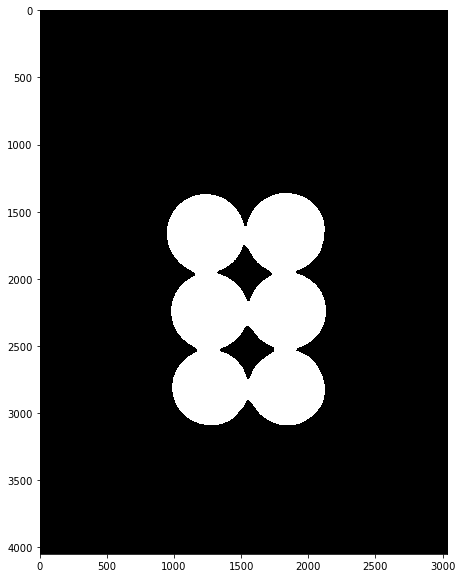

In [213]:
## Apply binary threshold 
ret, sep_thresh = cv2.threshold(coins_gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(sep_thresh)

In [214]:
# Dialate for obtaining the background 
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [215]:
sure_bg = cv2.dilate(sep_thresh,kernel,iterations =3)

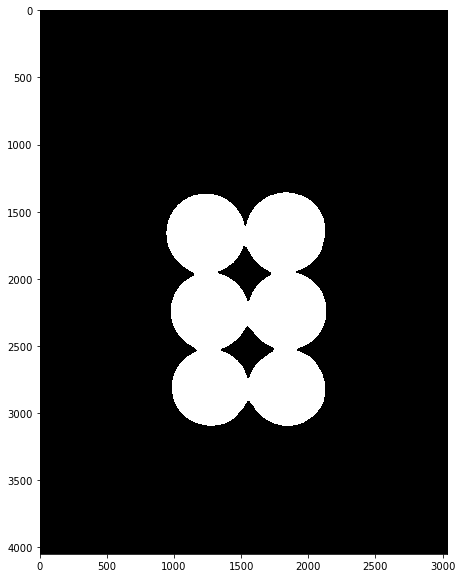

In [216]:
display(sure_bg)

In [217]:
dist_transform = cv2.distanceTransform(sep_thresh,cv2.DIST_L2,5)

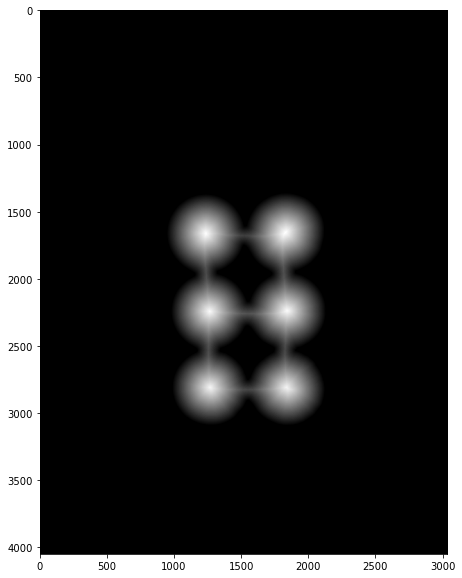

In [218]:
display(dist_transform)

In [219]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

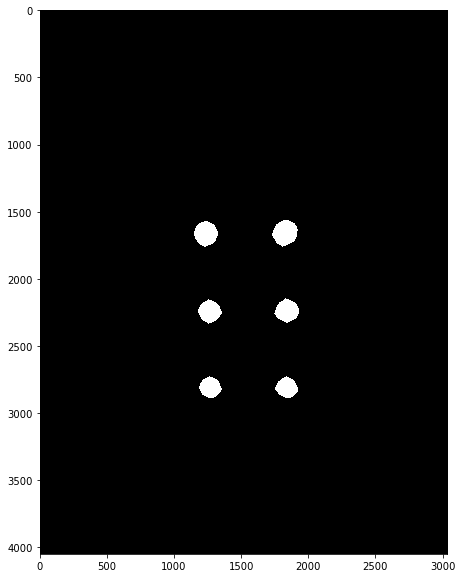

In [220]:
display(sure_fg)

In [221]:
sure_fg = np.uint8(sure_fg)

In [222]:
unknown = cv2.subtract(sure_bg,sure_fg)

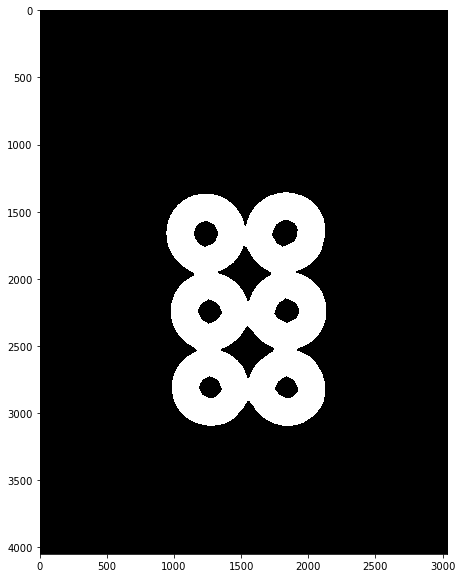

In [223]:
display(unknown)

In [224]:
ret,markers = cv2.connectedComponents(sure_fg)


In [225]:
markers = markers + 1 
markers[unknown == 255] = 0

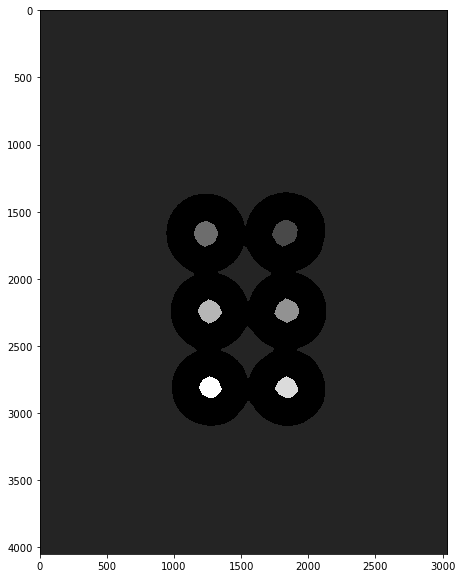

In [226]:
display(markers)

In [227]:
markers = cv2.watershed(img,markers)

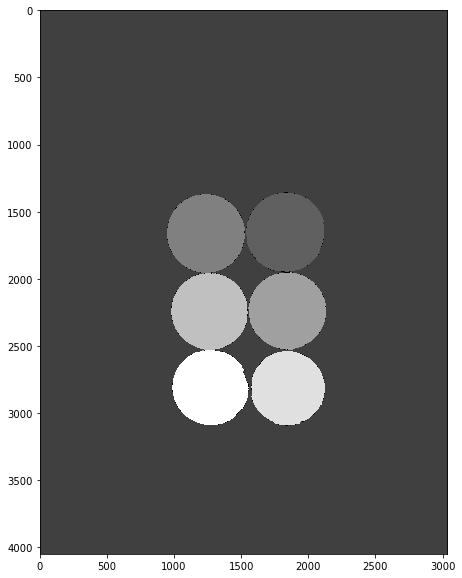

In [228]:
display(markers)

In [229]:
image,contours,hireachy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [234]:
for i in range(len(contours)):
    if hireachy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),15)
        

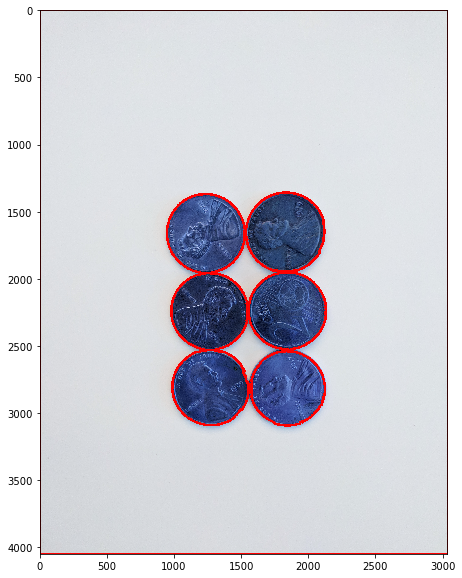

In [235]:
display(img)